# Rates analysis

### Load the data, add column names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV without using first row as headers
df = pd.read_csv('../output/sample_data.csv', header=None)

# Rename columns
columns = [
    'id', 'time_submitted', 'insurance_type', 'postal_Code', 'address', 'unit_num',
    'city', 'province', 'name', 'DOB', 'move_in', 'num_residents', 'active_insurance',
    'insured_before', 'num_claims', 'num_cancellations', 'multiline', 'fire_alarm',
    'deadbolt_locks', 'burglar_alarm', 'sprinkler_system', 'non_smokers',
    'fire_extinguishers', 'mortgages', 'email', 'number', 'carrier_lwr',
    'carrier', 'monthly', 'annual'
]

df.columns = columns
df.head()


,id,time_submitted,insurance_type,postal_Code,address,unit_num,city,province,name,DOB,...,sprinkler_system,non_smokers,fire_extinguishers,mortgages,email,number,carrier_lwr,carrier,monthly,annual
0,6c0f30c1-7cd9-4281-be93-6dd7563b4355,20250605_234917,H,M6G 2N6,336 Palmerston Blvd,NaN,TORONTO,ON,Rob Jones,1997-01-04,...,False,False,3,0,bigballs@gmail.com,4373343455,square_one,Square One Insurance Services,315.16,3782.0
1,9227618f-5a65-45a8-a263-826e89ddf47c,20250605_234917,H,M6G 2N6,336 Palmerston Blvd,NaN,TORONTO,ON,Rob Jones,1997-01-04,...,False,False,3,0,bigballs@gmail.com,4373343455,gore,Gore,1239.92,14879.0
2,4173432a-2115-43a6-a126-3b5376094904,20250605_234917,H,M6G 2N6,336 Palmerston Blvd,NaN,TORONTO,ON,Rob Jones,1997-01-04,...,False,False,3,0,bigballs@gmail.com,4373343455,pembridge,Pembridge,1496.75,17961.0
3,d2b7676a-d9d3-4b90-a53e-60974a8fa1a2,20250605_234917,H,M6G 2N6,336 Palmerston Blvd,NaN,TORONTO,ON,Rob Jones,1997-01-04,...,False,False,3,0,bigballs@gmail.com,4373343455,economical_mutual,Economical Mutual,2303.50,27642.0
4,ff09f2fb-7954-453f-ad70-19d0dd565c42,20250606_001001,H,M6G 2N6,336 Palmerston Blvd,NaN,TORONTO,ON,Rob Jones,1997-01-04,...,False,False,3,0,bigballs@gmail.com,4373343455,square_one,Square One Insurance Services,315.16,3782.0


## Exploratory analysis

Basic Statistics for Monthly Rates by Carrier:
                               monthly                       
                                  mean      min      max  std
carrier                                                      
Economical Mutual              2303.50  2303.50  2303.50  0.0
Gore                           1239.92  1239.92  1239.92  0.0
Pembridge                      1496.75  1496.75  1496.75  0.0
Square One Insurance Services   315.16   315.16   315.16  0.0


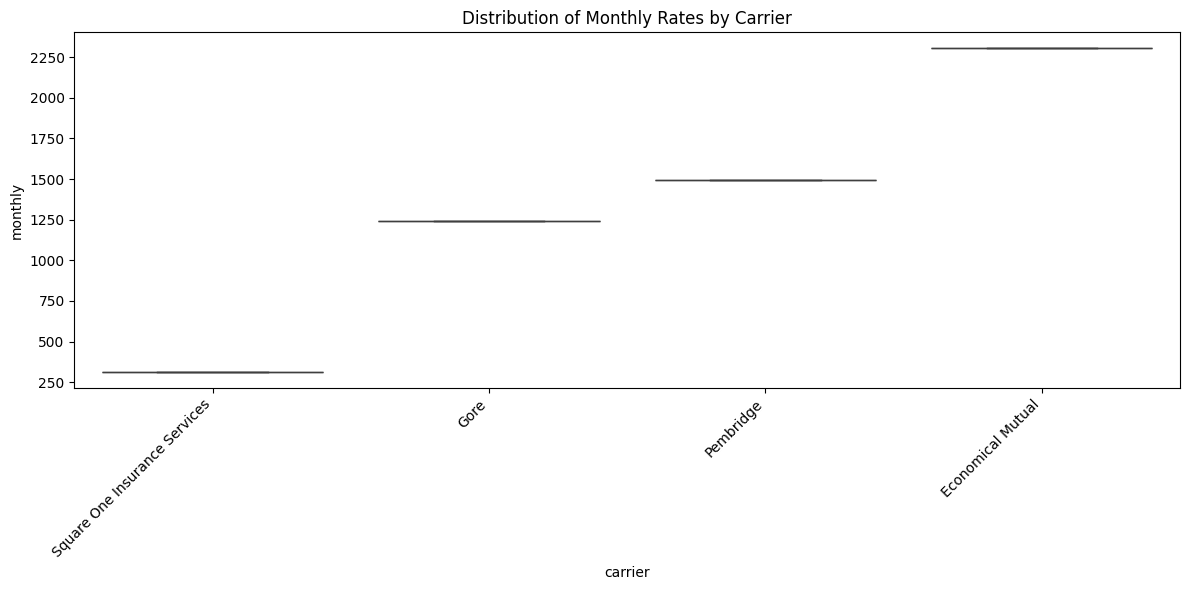


Price Variability (CV%) by Carrier:
carrier
Economical Mutual                0.0
Gore                             0.0
Pembridge                        0.0
Square One Insurance Services    0.0
Name: monthly, dtype: float64


In [3]:
# 1. Basic price statistics by carrier
print("Basic Statistics for Monthly Rates by Carrier:")
print(df.groupby('carrier')[['monthly']].agg(['mean', 'min', 'max', 'std']).round(2))

# Visualize distribution of monthly rates by carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier', y='monthly', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Monthly Rates by Carrier')
plt.tight_layout()
plt.show()

# Calculate the coefficient of variation (CV) to compare price variability
cv = df.groupby('carrier')['monthly'].agg(lambda x: x.std() / x.mean() * 100).round(2)
print("\nPrice Variability (CV%) by Carrier:")
print(cv.sort_values(ascending=False))


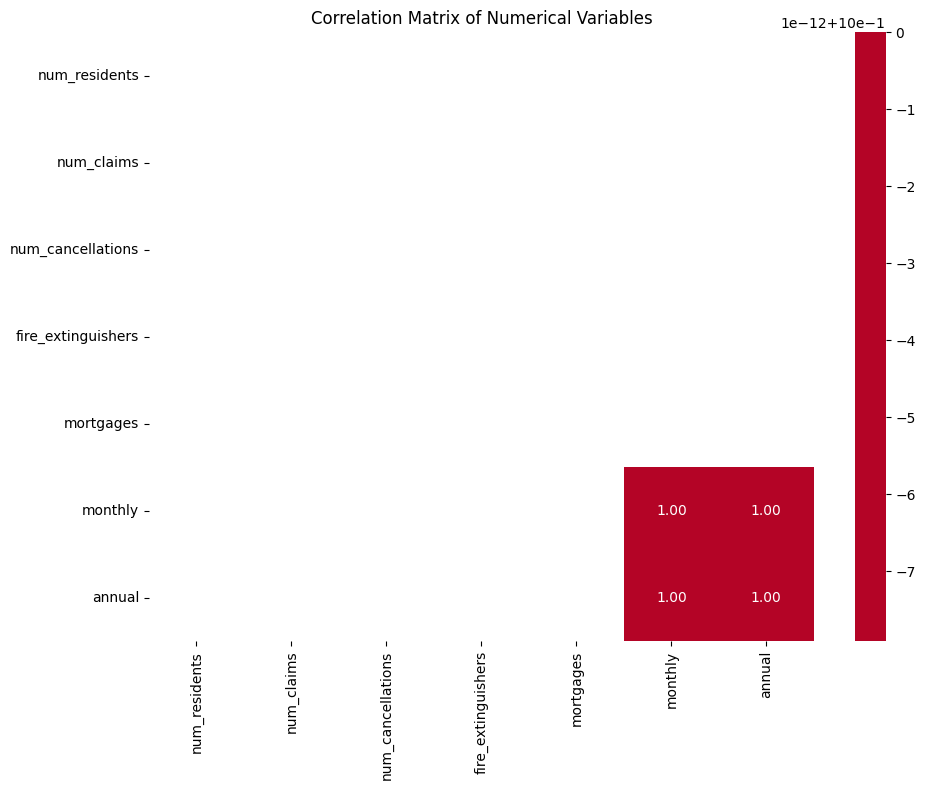


Strongest correlations with monthly rates:
monthly               1.0
annual                1.0
num_residents         NaN
num_claims            NaN
num_cancellations     NaN
fire_extinguishers    NaN
mortgages             NaN
Name: monthly, dtype: float64


In [6]:
# 2. Correlation analysis for numerical variables
numerical_cols = ['num_residents', 'num_claims', 'num_cancellations', 
                 'fire_extinguishers', 'mortgages', 'monthly', 'annual']

# Create correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print strongest correlations with monthly rates
correlations = corr_matrix['monthly'].sort_values(ascending=False)
print("\nStrongest correlations with monthly rates:")
print(correlations)

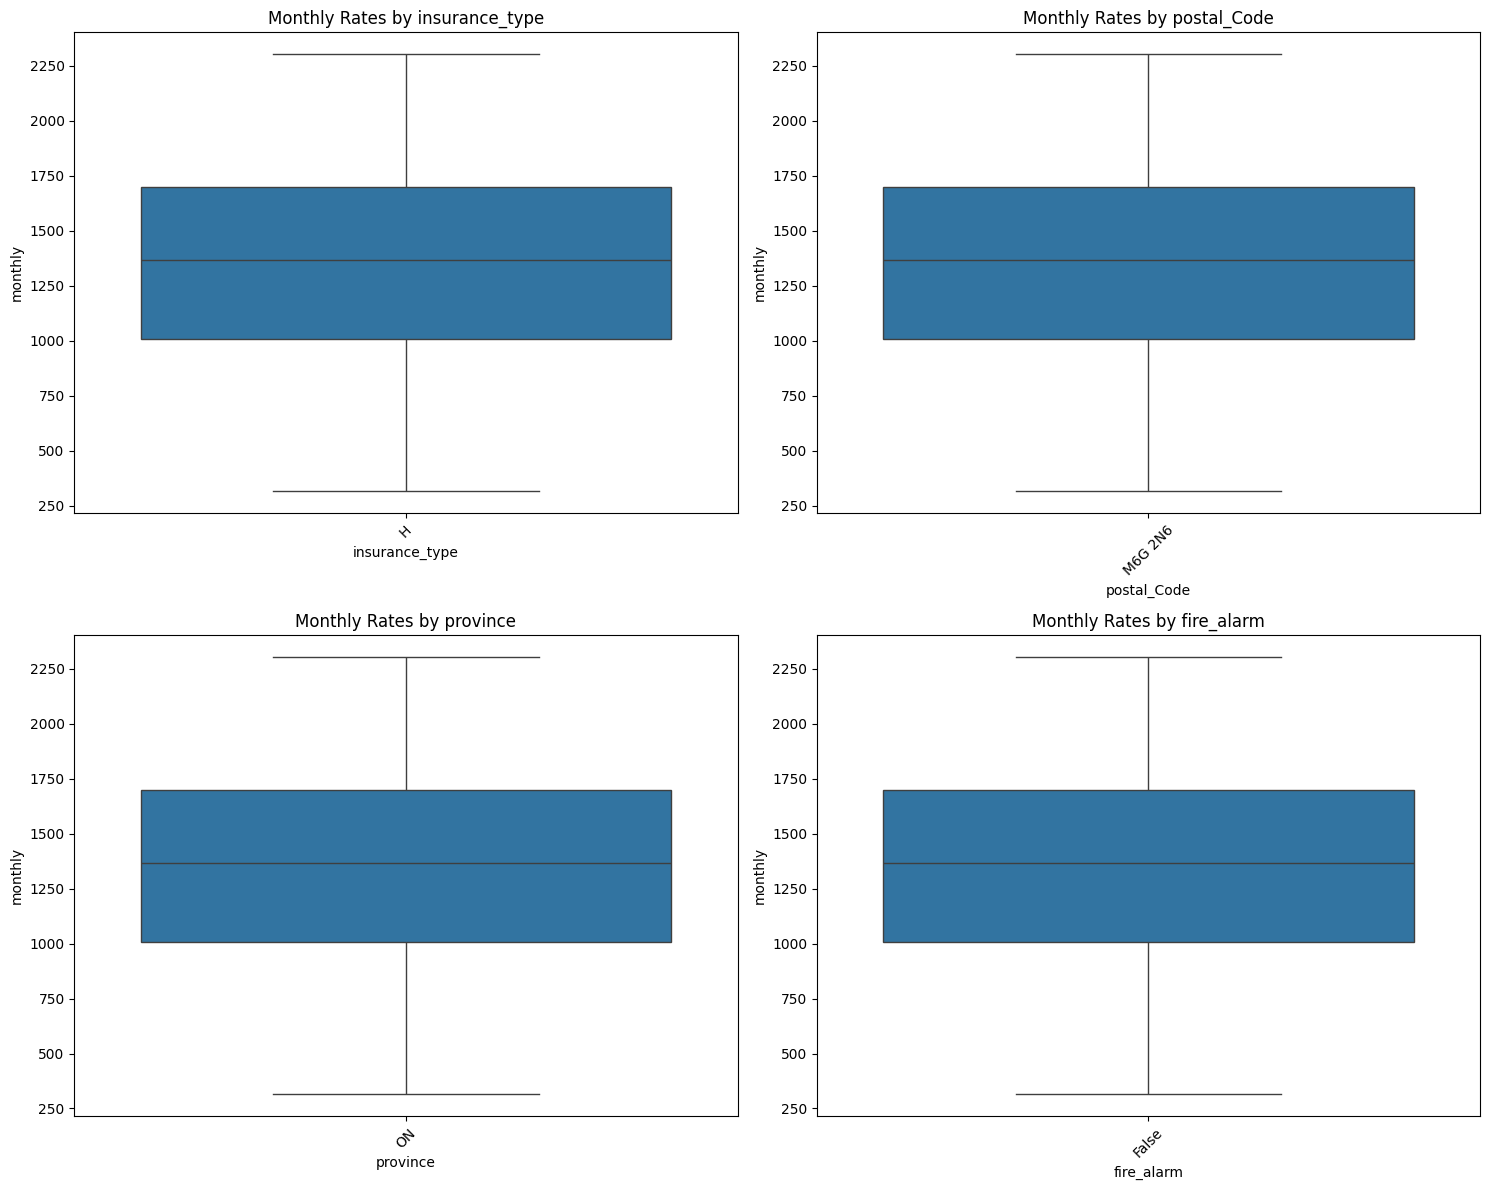


Average monthly rates by categorical variables:

insurance_type:
                   mean  count
insurance_type                
H               1338.83      8

postal_Code:
                mean  count
postal_Code                
M6G 2N6      1338.83      8

province:
             mean  count
province                
ON        1338.83      8

fire_alarm:
               mean  count
fire_alarm                
False       1338.83      8

deadbolt_locks:
                   mean  count
deadbolt_locks                
False           1338.83      8

burglar_alarm:
                  mean  count
burglar_alarm                
False          1338.83      8

sprinkler_system:
                     mean  count
sprinkler_system                
False             1338.83      8

non_smokers:
                mean  count
non_smokers                
False        1338.83      8


In [8]:
# 3. Analysis of categorical variables
categorical_vars = ['insurance_type', 'postal_Code', 'province', 
                   'fire_alarm', 'deadbolt_locks', 'burglar_alarm', 
                   'sprinkler_system', 'non_smokers']

# Create subplots for each categorical variable
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars[:4]):  # Show first 4 for space
    sns.boxplot(x=var, y='monthly', data=df, ax=axes[idx])
    axes[idx].set_title(f'Monthly Rates by {var}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate average rates for each categorical variable
print("\nAverage monthly rates by categorical variables:")
for var in categorical_vars:
    print(f"\n{var}:")
    print(df.groupby(var)['monthly'].agg(['mean', 'count']).round(2))



Analysis for Square One Insurance Services
--------------------------------------------------

Basic Statistics:
count      2.00
mean     315.16
std        0.00
min      315.16
25%      315.16
50%      315.16
75%      315.16
max      315.16
Name: monthly, dtype: float64

Top correlations with monthly rates:
num_residents        NaN
num_claims           NaN
num_cancellations    NaN
fire_extinguishers   NaN
mortgages            NaN
monthly              NaN
Name: monthly, dtype: float64


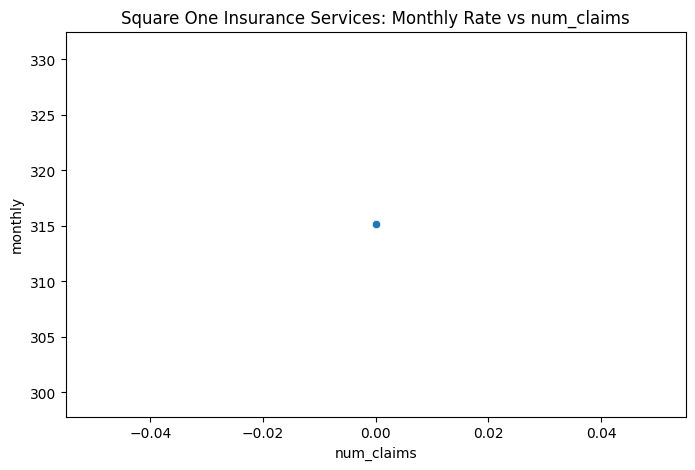


Analysis for Gore
--------------------------------------------------

Basic Statistics:
count       2.00
mean     1239.92
std         0.00
min      1239.92
25%      1239.92
50%      1239.92
75%      1239.92
max      1239.92
Name: monthly, dtype: float64

Top correlations with monthly rates:
num_residents        NaN
num_claims           NaN
num_cancellations    NaN
fire_extinguishers   NaN
mortgages            NaN
monthly              NaN
Name: monthly, dtype: float64


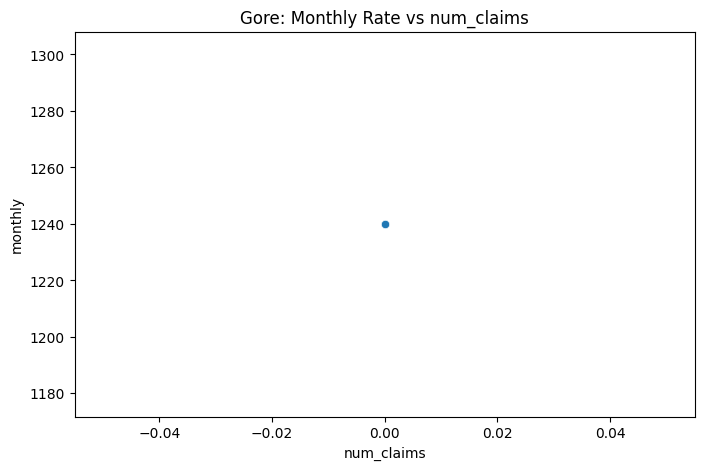


Analysis for Pembridge
--------------------------------------------------

Basic Statistics:
count       2.00
mean     1496.75
std         0.00
min      1496.75
25%      1496.75
50%      1496.75
75%      1496.75
max      1496.75
Name: monthly, dtype: float64

Top correlations with monthly rates:
num_residents        NaN
num_claims           NaN
num_cancellations    NaN
fire_extinguishers   NaN
mortgages            NaN
monthly              NaN
Name: monthly, dtype: float64


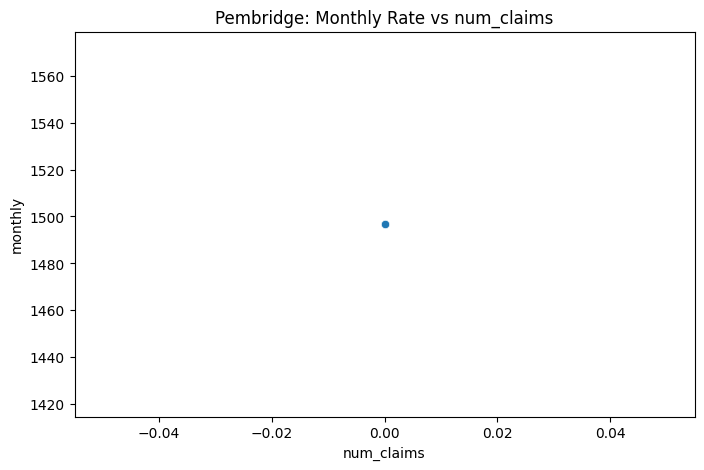


Analysis for Economical Mutual
--------------------------------------------------

Basic Statistics:
count       2.0
mean     2303.5
std         0.0
min      2303.5
25%      2303.5
50%      2303.5
75%      2303.5
max      2303.5
Name: monthly, dtype: float64

Top correlations with monthly rates:
num_residents        NaN
num_claims           NaN
num_cancellations    NaN
fire_extinguishers   NaN
mortgages            NaN
monthly              NaN
Name: monthly, dtype: float64


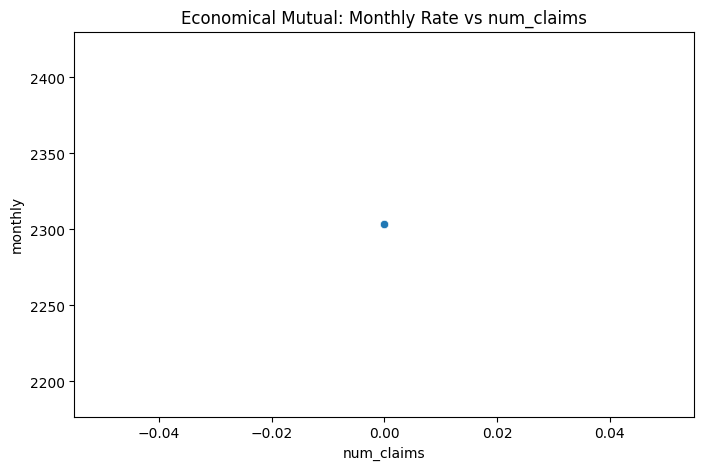

In [9]:
# 4. Carrier-specific analysis
# Create a function to analyze rates for a specific carrier
def analyze_carrier(carrier_name):
    carrier_data = df[df['carrier'] == carrier_name]
    
    print(f"\nAnalysis for {carrier_name}")
    print("-" * 50)
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(carrier_data['monthly'].describe().round(2))
    
    # Top correlations
    numerical_cols = ['num_residents', 'num_claims', 'num_cancellations', 
                     'fire_extinguishers', 'mortgages', 'monthly']
    correlations = carrier_data[numerical_cols].corr()['monthly'].sort_values(ascending=False)
    print("\nTop correlations with monthly rates:")
    print(correlations.round(3))
    
    # Plot relationship with top numerical variable
    top_num_var = correlations.index[1]  # Skip monthly itself
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=carrier_data, x=top_num_var, y='monthly')
    plt.title(f'{carrier_name}: Monthly Rate vs {top_num_var}')
    plt.show()

# Analyze each carrier
for carrier in df['carrier'].unique():
    analyze_carrier(carrier)
